In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates
import requests
import json
from pathlib import Path
import time
from datetime import datetime
import datetime
import sys

In [2]:
%matplotlib inline

## Function to convert day number to day

In [3]:
def convert_day(num):
    if num == 1:
        return 'Monday'
    elif num == 2:
        return 'Tuesday'
    elif num == 3:
        return 'Wednesday'
    elif num == 4:
        return 'Thursday'
    elif num == 5:
        return 'Friday'
    elif num == 6:
        return 'Saturday'
    else:
        return 'Sunday'

## Function to convert Month number to Month

In [4]:
def convert_month(num):
    if num == 1:
        return 'January'
    elif num == 2:
        return 'February'
    elif num == 3:
        return 'March'
    elif num == 4:
        return 'April'
    elif num == 5:
        return 'May'
    elif num == 6:
        return 'June'
    elif num == 7:
        return 'July'
    elif num == 8:
        return 'August'
    elif num == 9:
        return 'September'
    elif num == 10:
        return 'October'
    elif num == 11:
        return 'November'
    else:
        return 'December'

In [5]:
#path to files
file_path_csv_weather = Path('C:\\Users\\corma\\Documents\\GitHub\\Dublin-Bikes-Helper\\MachineLearn_DBH\\weather_info.csv')
file_path_csv_bike = Path('C:\\Users\\corma\\Documents\\GitHub\\Dublin-Bikes-Helper\\MachineLearn_DBH\\bike_info.csv')

In [6]:
#Read files
df = pd.read_csv(file_path_csv_bike,index_col=False)
dfw = pd.read_csv(file_path_csv_weather,index_col=False)

In [7]:
df.shape

(723761, 12)

In [8]:
df.describe()

,#,number,bike_stand,bike_stand_available,bike_available,delete_flag
count,723761.000000,723761.00000,723761.000000,723761.000000,723761.000000,723761.0
mean,361881.000000,60.29152,31.881045,19.783879,11.726846,0.0
std,208931.948427,42.60704,7.652676,11.036811,9.627315,0.0
min,1.000000,1.00000,1.000000,0.000000,0.000000,0.0
25%,180941.000000,29.00000,29.000000,11.000000,4.000000,0.0
50%,361881.000000,59.00000,30.000000,20.000000,10.000000,0.0
75%,542821.000000,89.00000,40.000000,28.000000,18.000000,0.0
max,723761.000000,507.00000,40.000000,40.000000,40.000000,0.0


In [9]:
df.dtypes

#                        int64
id                      object
number                   int64
name                    object
address                 object
bike_stand               int64
bike_stand_available     int64
bike_available           int64
status                  object
last_update             object
creat_time              object
delete_flag              int64
dtype: object

In [10]:
dfw.shape

(1061, 13)

In [11]:
dfw.describe()

,coord_lon,coord_lat,weather_id,temp,temp_feel,wind_speed,clouds,delete_flag
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.0
mean,-6.260217,53.349538,726.601320,280.417342,277.726899,6.124109,64.741753,0.0
std,0.001164,0.001256,139.169302,3.817646,5.169737,2.659865,20.545055,0.0
min,-6.264900,53.345300,300.000000,272.420000,267.380000,1.030000,0.000000,0.0
25%,-6.260300,53.349800,800.000000,277.280000,273.350000,4.120000,75.000000,0.0
50%,-6.260300,53.349800,803.000000,280.130000,277.010000,6.170000,75.000000,0.0
75%,-6.260300,53.349800,803.000000,283.770000,282.990000,8.230000,75.000000,0.0
max,-6.255000,53.354500,803.000000,289.070000,288.550000,13.890000,100.000000,0.0


In [12]:
dfw.dtypes

id               object
coord_lon       float64
coord_lat       float64
weather_id        int64
weather_main     object
temp            float64
temp_feel       float64
wind_speed      float64
clouds            int64
sunrise          object
sunset           object
creat_time       object
delete_flag       int64
dtype: object

dfw.head(20)

## Set up Time Parmeters - Bike and Weather

In [13]:
df["TIME"] = pd.to_datetime(df["creat_time"],format='%d/%m/%Y %H:%M')
df["YEAR"] = df["TIME"].dt.year
df["MONTH"] = df["TIME"].dt.month
df['Day_of_Week'] = df['TIME'].dt.dayofweek
df["DAY_num"] = df["TIME"].dt.day
df["HOUR"] = df["TIME"].dt.hour
df["MINUTE"] = df["TIME"].dt.minute

In [14]:
df.dtypes

#                                int64
id                              object
number                           int64
name                            object
address                         object
bike_stand                       int64
bike_stand_available             int64
bike_available                   int64
status                          object
last_update                     object
creat_time                      object
delete_flag                      int64
TIME                    datetime64[ns]
YEAR                             int64
MONTH                            int64
Day_of_Week                      int64
DAY_num                          int64
HOUR                             int64
MINUTE                           int64
dtype: object

In [15]:
dfw["TIME"] = pd.to_datetime(dfw["creat_time"],format='%d/%m/%Y %H:%M')

dfw["YEAR"] = dfw["TIME"].dt.year
col =np.array(dfw["YEAR"],np.int64) #Converts float to int
dfw["YEAR"] = col #Converts float to int

dfw["MONTH"] = dfw["TIME"].dt.month
col =np.array(dfw["MONTH"] ,np.int64)
dfw["MONTH"]  = col

dfw['Day_of_Week'] = dfw['TIME'].dt.dayofweek
col =np.array(dfw['Day_of_Week'],np.int64) 
dfw['Day_of_Week'] = col 
dfw["DAY_num"] = dfw["TIME"].dt.day
col =np.array(dfw["DAY_num"],np.int64)
dfw["DAY_num"] = col

dfw["HOUR"] = dfw["TIME"].dt.hour
col =np.array(dfw["HOUR"] ,np.int64)
dfw["HOUR"]  = col

dfw["MINUTE"] = dfw["TIME"].dt.minute
col =np.array(dfw["MINUTE"] ,np.int64)
dfw["MINUTE"] = col

In [16]:
dfw.dtypes

id                      object
coord_lon              float64
coord_lat              float64
weather_id               int64
weather_main            object
temp                   float64
temp_feel              float64
wind_speed             float64
clouds                   int64
sunrise                 object
sunset                  object
creat_time              object
delete_flag              int64
TIME            datetime64[ns]
YEAR                     int64
MONTH                    int64
Day_of_Week              int64
DAY_num                  int64
HOUR                     int64
MINUTE                   int64
dtype: object

In [17]:
df.loc[df['Day_of_Week'] == 0, 'DAY'] = 'Mon'  
df.loc[df['Day_of_Week'] == 1, 'DAY'] = 'Tue'  
df.loc[df['Day_of_Week'] == 2, 'DAY'] = 'Wed'  
df.loc[df['Day_of_Week'] == 3, 'DAY'] = 'Thu'  
df.loc[df['Day_of_Week'] == 4, 'DAY'] = 'Fri' 
df.loc[df['Day_of_Week'] == 5, 'DAY'] = 'Sat' 
df.loc[df['Day_of_Week'] == 6, 'DAY'] = 'Sun' 
df["DAY"].unique()

array(['Wed', 'Thu', 'Sat', 'Tue', 'Mon', 'Sun', 'Fri'], dtype=object)

In [18]:
dfw.loc[dfw['Day_of_Week'] == 0, 'DAY'] = 'Mon'  
dfw.loc[dfw['Day_of_Week'] == 1, 'DAY'] = 'Tue'  
dfw.loc[dfw['Day_of_Week'] == 2, 'DAY'] = 'Wed'  
dfw.loc[dfw['Day_of_Week'] == 3, 'DAY'] = 'Thu'  
dfw.loc[dfw['Day_of_Week'] == 4, 'DAY'] = 'Fri' 
dfw.loc[dfw['Day_of_Week'] == 5, 'DAY'] = 'Sat' 
dfw.loc[dfw['Day_of_Week'] == 6, 'DAY'] = 'Sun' 
dfw["DAY"].unique()

array(['Mon', 'Wed', 'Sun', 'Thu', 'Sat', 'Fri', 'Tue'], dtype=object)

In [19]:
df.dtypes

#                                int64
id                              object
number                           int64
name                            object
address                         object
bike_stand                       int64
bike_stand_available             int64
bike_available                   int64
status                          object
last_update                     object
creat_time                      object
delete_flag                      int64
TIME                    datetime64[ns]
YEAR                             int64
MONTH                            int64
Day_of_Week                      int64
DAY_num                          int64
HOUR                             int64
MINUTE                           int64
DAY                             object
dtype: object

In [20]:
dfw.dtypes

id                      object
coord_lon              float64
coord_lat              float64
weather_id               int64
weather_main            object
temp                   float64
temp_feel              float64
wind_speed             float64
clouds                   int64
sunrise                 object
sunset                  object
creat_time              object
delete_flag              int64
TIME            datetime64[ns]
YEAR                     int64
MONTH                    int64
Day_of_Week              int64
DAY_num                  int64
HOUR                     int64
MINUTE                   int64
DAY                     object
dtype: object

## Set up Search Parameters for Bike (Station ID, Day) 

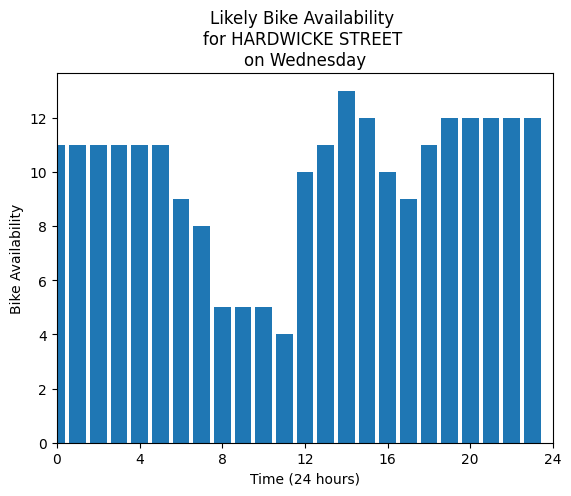

In [21]:
#Check Bike availability or Bike Parking Availability
req = 'b' #input("Do you want to check for Bike Availability (Type: b) or Parking Availability (Type: p): ")
if req == 'b' or req == 'B' or req == 'p' or req == 'P' or req == 'bike' or req == 'Bike' or req == 'park' or req == 'Park':

    #Month
    month_num = 3

    #Day of the week
    day_num = 4 #int(input("Enter Day Number (1 = Mon, 2 = Tues, 3 = Wed etc): "))
    
    #Hour
    hour_num = 12
    
    #Minute pass the hour
    #min_num = int(input("Enter Minute pass the hour (0 - 15 - 30 - 45): "))
    
    #Station ID
    stationid = 15 #int(input("Enter Station ID (1 to 117): "))

    try:
        stationname = df.loc[(df['number']==stationid),'name'].values[0]
        
        #Filter data based on certain input parameters
        df['station_select'] = (df['YEAR']==2023) & (df['MONTH']==month_num) & (df['Day_of_Week']==day_num-1) & (df['number']==stationid)
        
        ## Set up x- and y-axis of Plot
        x =df['HOUR'].loc[df['station_select']]

        if req == 'bike' or req == 'Bike' or req == 'b' or req == 'B':
            y = df['bike_available'].loc[df['station_select']]
            plt.ylabel("Bike Availability")
            plt.title(f'Likely Bike Availability \nfor {stationname} \non {convert_day(day_num-1)}')
            
        elif req == 'park' or req == 'Park' or req == 'p' or req == 'P':
            y = df['bike_stand_available'].loc[df['station_select']]
            plt.ylabel("Bike Parking Availability")
            plt.title(f'Likely Bike Parking Availability \nfor {stationname} \non {convert_day(day_num-1)}')
            print("OK")
       
        #Set Up Plot
        plt.xlabel("Time (24 hours)")
        ytick = np.array([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44])
        xtick = np.array([0,4,8,12,16,20,24])
        plt.xticks(xtick)
        plt.yticks(ytick)
        plt.xlim(0,24)
        plt.bar(x,y)
        plt.show()
    except:
        print ("Station ID Does not exist")
    
else:
    print("Incorrect Entry")

## Examine Weather Information

In [22]:
#dfw["weather_main"].unique()
dfw["temp"] = dfw["temp"]-273.15
dfw["temp_feel"] = dfw["temp_feel"]-273.15
#dfw["wind_speed"].unique()
dfw["clouds"].unique()

array([ 75,  20,  40, 100,   0,  51], dtype=int64)

In [23]:
dfw['time_select'] = (dfw['Day_of_Week']==day_num-1) & (dfw['MONTH']==month_num) #& (dfw["HOUR_w"] == hour_num)


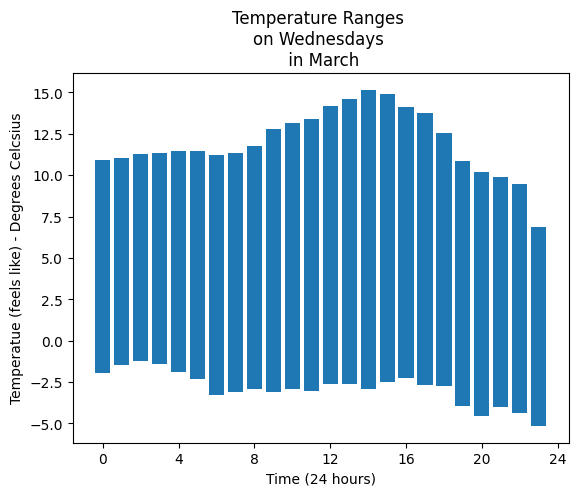

In [24]:
#Set X and Y plot
x =dfw['HOUR'].loc[dfw['time_select']]
y = dfw["temp_feel"].loc[dfw['time_select']]

#Create Plot
plt.title(f'Temperature Ranges \non {convert_day(day_num-1)}s \n in {convert_month(day_num-1)}')
plt.xlabel("Time (24 hours)")
plt.ylabel("Temperatue (feels like) - Degrees Celcsius")
#ytick = np.array([0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44])
xtick = np.array([0,4,8,12,16,20,24])
plt.xticks(xtick)
#plt.yticks(ytick)
plt.bar(x,y)
plt.show()

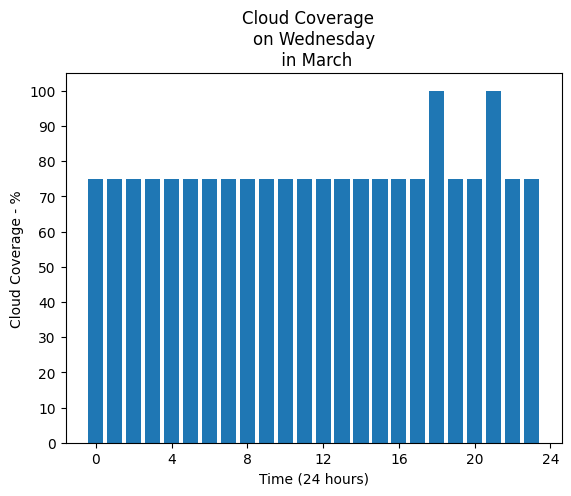

In [25]:
#Set X and Y plot
x =dfw['HOUR'].loc[dfw['time_select']]
y = dfw["clouds"].loc[dfw['time_select']]

#Create Plot
plt.title(f'Cloud Coverage  \non {convert_day(day_num-1)}\n in {convert_month(day_num-1)}')
plt.xlabel("Time (24 hours)")
plt.ylabel("Cloud Coverage - %")
ytick = np.array([0,10,20,30,40,50,60,70,80,90,100])
xtick = np.array([0,4,8,12,16,20,24])
plt.xticks(xtick)
plt.yticks(ytick)
#plt.xlim(0,24)
plt.bar(x,y)
plt.show()

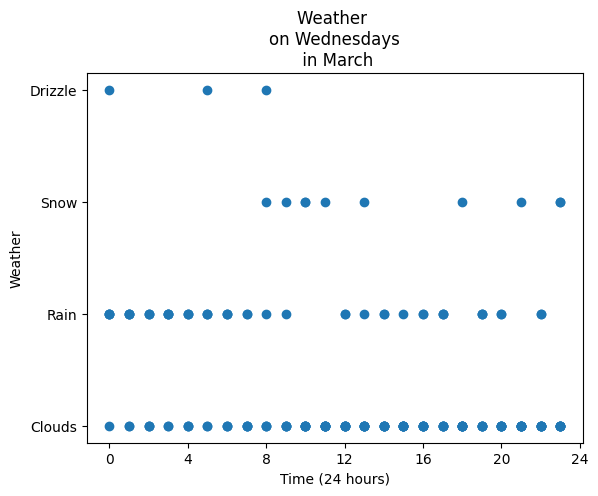

In [26]:
#Set X and Y plot
x =dfw['HOUR'].loc[dfw['time_select']]
y = dfw["weather_main"].loc[dfw['time_select']]

#Create Plot
plt.title(f'Weather \non {convert_day(day_num-1)}s\n in {convert_month(day_num-1)}')
plt.xlabel("Time (24 hours)")
plt.ylabel("Weather")
#ytick = np.array([0,10,20,30,40,50,60,70,80,90,100])
xtick = np.array([0,4,8,12,16,20,24])
plt.xticks(xtick)
#plt.yticks(ytick)
#plt.xlim(0,24)
plt.scatter(x,y)
plt.show()

## Combine the two dataframes

In [51]:
df_merge = df.merge(dfw, on="TIME")
df_merge.shape

(24101, 42)

df.merge(dfw,on='TIME')

In [52]:
df_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
#,24101.0,363190.482636,209997.101938,61.0000,182043.0000,363096.0000,546956.0000,723711.0000
number,24101.0,60.412638,43.290873,1.0000,29.0000,59.0000,89.0000,507.0000
bike_stand,24101.0,31.872287,7.666679,1.0000,29.0000,30.0000,40.0000,40.0000
bike_stand_available,24101.0,19.742500,11.080127,0.0000,11.0000,20.0000,28.0000,40.0000
bike_available,24101.0,11.739596,9.691588,0.0000,4.0000,10.0000,18.0000,40.0000
delete_flag_x,24101.0,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000
YEAR_x,24101.0,2023.000000,0.000000,2023.0000,2023.0000,2023.0000,2023.0000,2023.0000
MONTH_x,24101.0,3.000000,0.000000,3.0000,3.0000,3.0000,3.0000,3.0000
Day_of_Week_x,24101.0,2.956807,1.920819,0.0000,1.0000,3.0000,5.0000,6.0000
DAY_num_x,24101.0,12.481059,6.487852,2.0000,6.0000,12.0000,18.0000,24.0000


In [43]:
df_merge.head()

,#,id_x,number,name,address,bike_stand,bike_stand_available,bike_available,status,last_update,...,creat_time_y,delete_flag_y,YEAR_y,MONTH_y,Day_of_Week_y,DAY_num_y,HOUR_y,MINUTE_y,DAY_y,time_select
0,61,0005a69485fd4846,20,JAMES STREET EAST,James Street East,30,30,0,OPEN,09/03/2023 19:18,...,09/03/2023 19:27,0,2023,3,3,9,19,27,Thu,True
1,6889,027c49405f914f96,68,HANOVER QUAY,Hanover Quay,40,40,0,OPEN,09/03/2023 19:22,...,09/03/2023 19:27,0,2023,3,3,9,19,27,Thu,True
2,33285,0bd9a84689594421,38,TALBOT STREET,Talbot Street,40,22,18,OPEN,09/03/2023 19:19,...,09/03/2023 19:27,0,2023,3,3,9,19,27,Thu,True
3,33328,0bdeaea16e64492d,51,YORK STREET WEST,York Street West,40,37,3,OPEN,09/03/2023 19:21,...,09/03/2023 19:27,0,2023,3,3,9,19,27,Thu,True
4,37570,0d5eb714cf404ebc,93,HEUSTON STATION (CENTRAL),Heuston Station (Central),40,10,30,OPEN,09/03/2023 19:19,...,09/03/2023 19:27,0,2023,3,3,9,19,27,Thu,True


In [46]:
df_merge.drop(labels=['delete_flag_y','id_x','delete_flag_x'],axis=1,inplace=True)

In [47]:
df_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
#,24101.0,363190.482636,209997.101938,61.0000,182043.0000,363096.0000,546956.0000,723711.0000
number,24101.0,60.412638,43.290873,1.0000,29.0000,59.0000,89.0000,507.0000
bike_stand,24101.0,31.872287,7.666679,1.0000,29.0000,30.0000,40.0000,40.0000
bike_stand_available,24101.0,19.742500,11.080127,0.0000,11.0000,20.0000,28.0000,40.0000
bike_available,24101.0,11.739596,9.691588,0.0000,4.0000,10.0000,18.0000,40.0000
YEAR_x,24101.0,2023.000000,0.000000,2023.0000,2023.0000,2023.0000,2023.0000,2023.0000
MONTH_x,24101.0,3.000000,0.000000,3.0000,3.0000,3.0000,3.0000,3.0000
Day_of_Week_x,24101.0,2.956807,1.920819,0.0000,1.0000,3.0000,5.0000,6.0000
DAY_num_x,24101.0,12.481059,6.487852,2.0000,6.0000,12.0000,18.0000,24.0000
HOUR_x,24101.0,11.250031,7.084819,0.0000,4.0000,12.0000,17.0000,23.0000
